
# 📊 Análise de Dados Hoteleiros

Este Código realiza uma análise exploratória de dados de um hotel (Dados Fictícios), incluindo informações sobre hóspedes, reservas e faturamento. As análises foram realizadas utilizando Python, Pandas, Matplotlib e Seaborn.

---


In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [15]:

# Leitura dos arquivos CSV
hospedes = pd.read_csv('Hospedes.csv')
reservas = pd.read_csv('Reservas.csv')

# Visualizando os dados
hospedes.head(), reservas.head()


(   HospedeID    Documento       Nome DataNascimento     Genero
 0          1   4442976610  Hospede_1     1960-01-02  Masculino
 1          2  86946154514  Hospede_2     2016-02-20   Feminino
 2          3  86536155749  Hospede_3     1995-11-07  Masculino
 3          4  10284216665  Hospede_4     1953-02-15   Feminino
 4          5  70829190431  Hospede_5     2011-07-10   Feminino,
    DocumentoHospede DataCheckin DataCheckout  NumeroQuarto TipoQuarto  \
 0        4442976610  2020-02-05   2020-02-06           665       Luxo   
 1        4442976610  2020-08-17   2020-08-31           406       Luxo   
 2       86946154514  2021-01-29   2021-02-08           756       Luxo   
 3       86946154514  2021-06-17   2021-06-28           988  Executivo   
 4       86946154514  2022-02-20   2022-03-05           157  Executivo   
 
    ValorReserva  
 0       1005.67  
 1        818.42  
 2       1256.61  
 3        746.84  
 4        308.71  )

In [16]:

# Junção das tabelas
df_geral = reservas.merge(hospedes, left_on='DocumentoHospede', right_on='Documento')

# Tratamento das colunas de data
df_geral['DataCheckin'] = pd.to_datetime(df_geral['DataCheckin'])
df_geral['DataCheckout'] = pd.to_datetime(df_geral['DataCheckout'])
df_geral['DataNascimento'] = pd.to_datetime(df_geral['DataNascimento'], errors='coerce')

# Cálculo da idade dos hóspedes
df_geral['Idade'] = (df_geral['DataCheckin'] - df_geral['DataNascimento']).dt.days // 365

# Cálculo dos dias de estadia
df_geral['DiasEstadia'] = (df_geral['DataCheckout'] - df_geral['DataCheckin']).dt.days

df_geral.head()


,DocumentoHospede,DataCheckin,DataCheckout,NumeroQuarto,TipoQuarto,ValorReserva,HospedeID,Documento,Nome,DataNascimento,Genero,Idade,DiasEstadia
0,4442976610,2020-02-05,2020-02-06,665,Luxo,1005.67,1,4442976610,Hospede_1,1960-01-02,Masculino,60,1
1,4442976610,2020-08-17,2020-08-31,406,Luxo,818.42,1,4442976610,Hospede_1,1960-01-02,Masculino,60,14
2,86946154514,2021-01-29,2021-02-08,756,Luxo,1256.61,2,86946154514,Hospede_2,2016-02-20,Feminino,4,10
3,86946154514,2021-06-17,2021-06-28,988,Executivo,746.84,2,86946154514,Hospede_2,2016-02-20,Feminino,5,11
4,86946154514,2022-02-20,2022-03-05,157,Executivo,308.71,2,86946154514,Hospede_2,2016-02-20,Feminino,6,13


C:\Users\raphael.pinheiro\AppData\Local\Temp\ipykernel_25204\4215188402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quartos.index, y=quartos.values, palette="Blues_d")


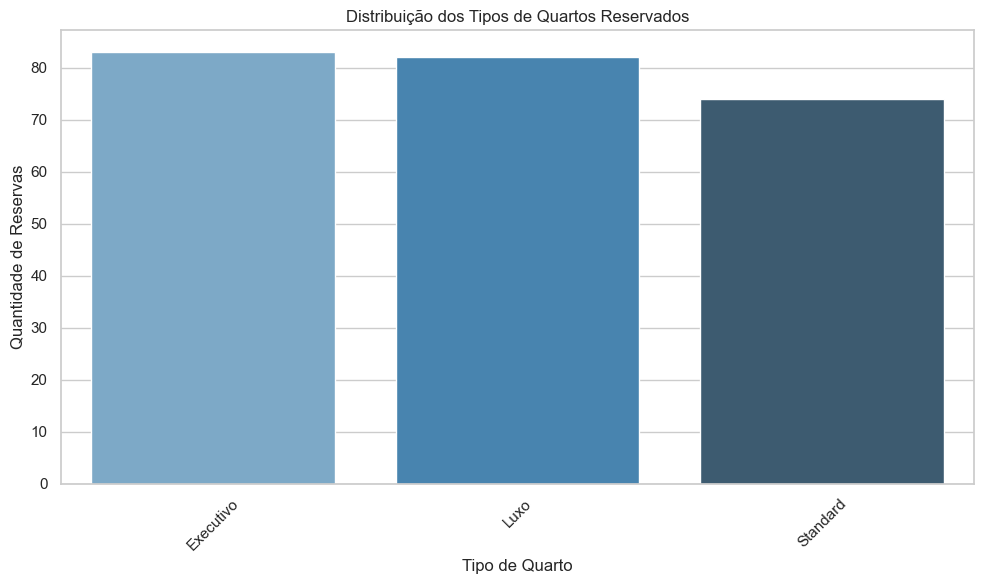

In [17]:

# Distribuição dos Tipos de Quartos
quartos = df_geral['TipoQuarto'].value_counts()

plt.figure()
sns.barplot(x=quartos.index, y=quartos.values, palette="Blues_d")
plt.title('Distribuição dos Tipos de Quartos Reservados')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Quantidade de Reservas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\raphael.pinheiro\AppData\Local\Temp\ipykernel_25204\1196412427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_quarto.index, y=faturamento_quarto.values, palette="Greens_d")


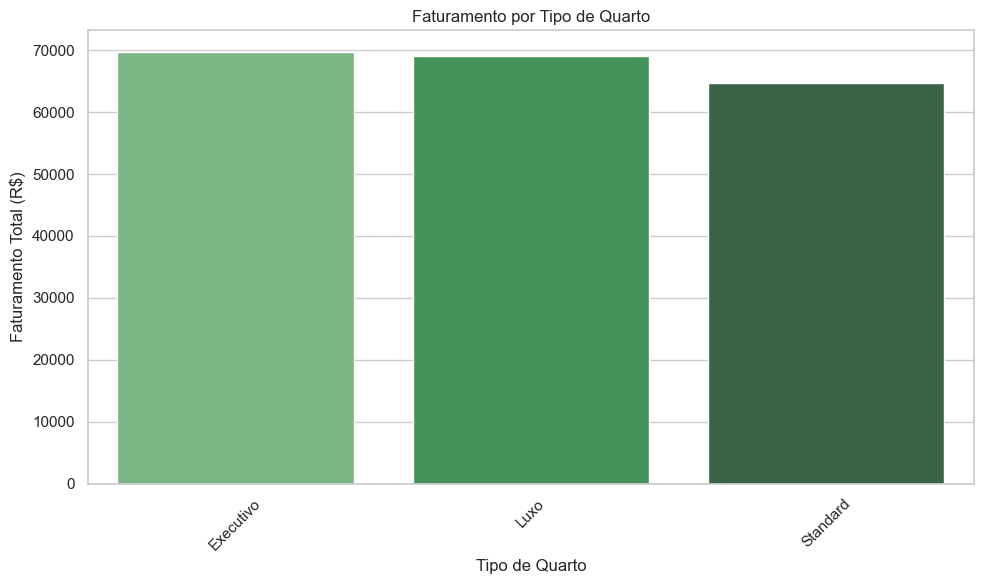

In [25]:

# Faturamento por Tipo de Quarto
faturamento_quarto = df_geral.groupby('TipoQuarto')['ValorReserva'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=faturamento_quarto.index, y=faturamento_quarto.values, palette="Greens_d")
plt.title('Faturamento por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


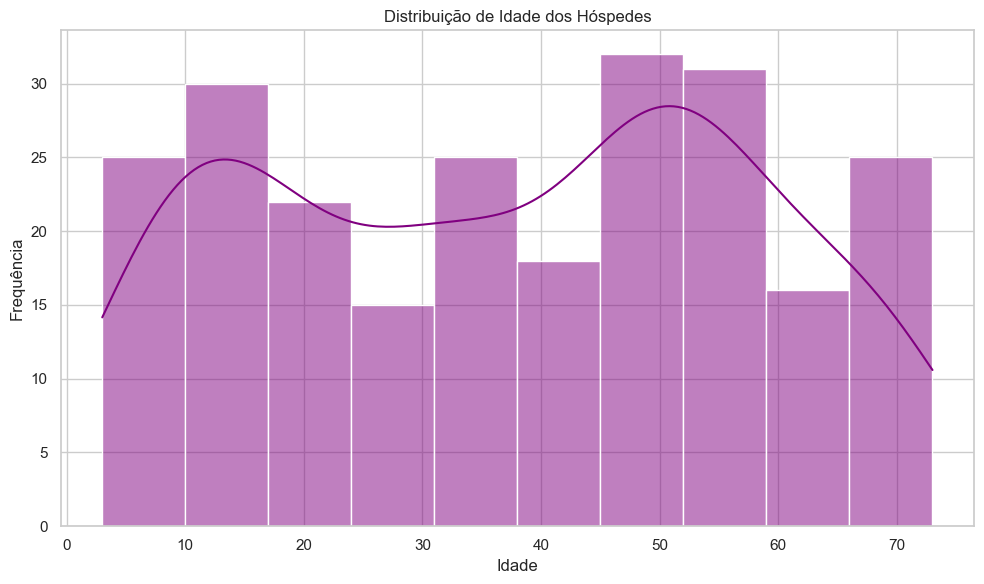

In [19]:

# Distribuição de Idade dos Hóspedes
plt.figure()
sns.histplot(df_geral['Idade'].dropna(), bins=10, kde=True, color='purple')
plt.title('Distribuição de Idade dos Hóspedes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


C:\Users\raphael.pinheiro\AppData\Local\Temp\ipykernel_25204\1823585957.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero.index, y=genero.values, palette="pastel")


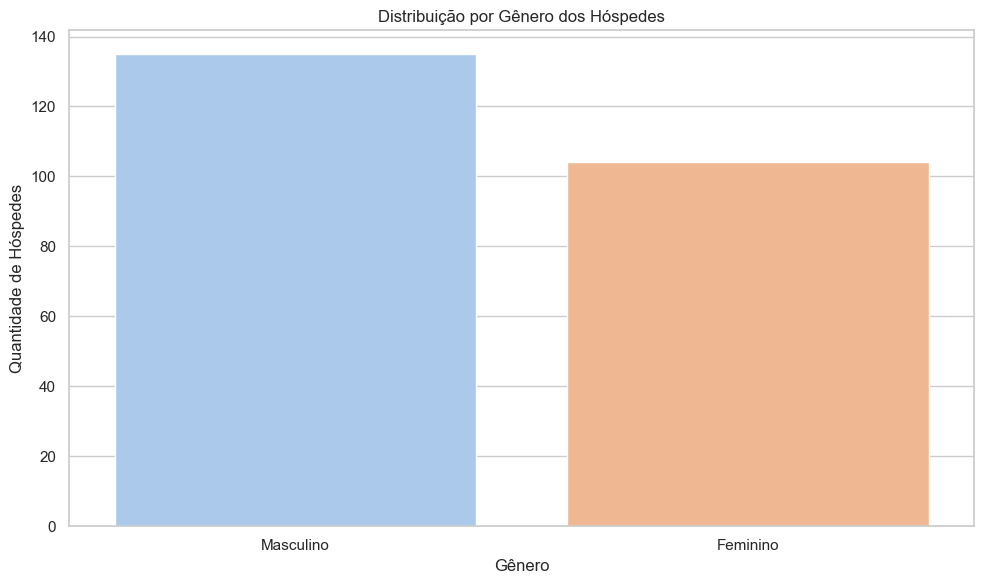

In [20]:

# Distribuição por Gênero
genero = df_geral['Genero'].value_counts()

plt.figure()
sns.barplot(x=genero.index, y=genero.values, palette="pastel")
plt.title('Distribuição por Gênero dos Hóspedes')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Hóspedes')
plt.tight_layout()
plt.show()


In [21]:

# Tempo Médio de Estadia
tempo_medio = df_geral['DiasEstadia'].mean()
print(f"🕒 Tempo médio de estadia: {tempo_medio:.2f} dias")


🕒 Tempo médio de estadia: 7.84 dias


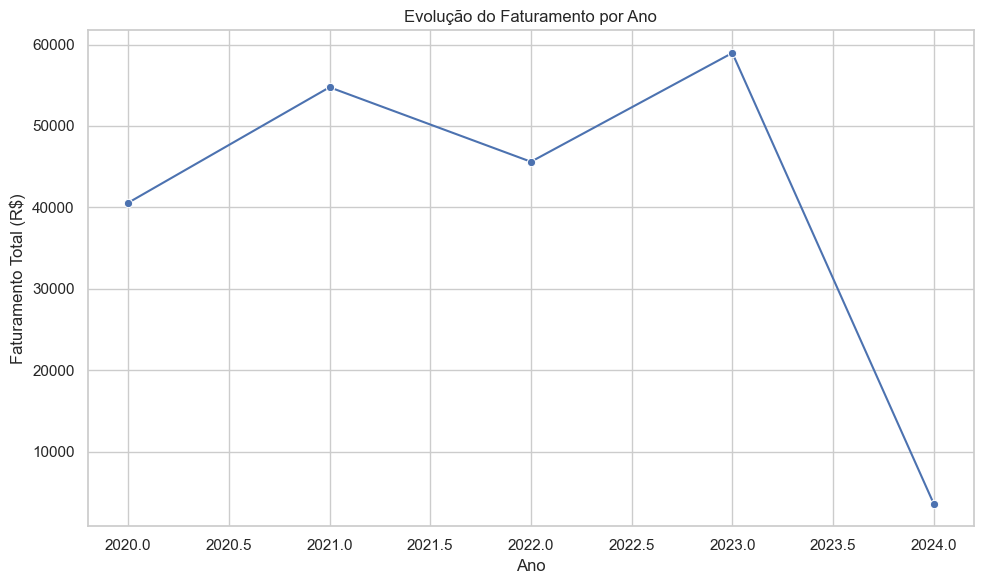

Ano
2020    40564.76
2021    54753.16
2022    45604.26
2023    58964.87
2024     3611.95
Name: ValorReserva, dtype: float64

In [22]:

# Evolução do Faturamento por Ano
df_geral['Ano'] = df_geral['DataCheckin'].dt.year
faturamento_ano = df_geral.groupby('Ano')['ValorReserva'].sum()

plt.figure()
sns.lineplot(x=faturamento_ano.index, y=faturamento_ano.values, marker='o')
plt.title('Evolução do Faturamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Faturamento Total (R$)')
plt.tight_layout()
plt.show()

faturamento_ano
